# Portfolio Theory: Monte Carlo Simulation
  
by Christoph Güttner  
    
**Abstract:** Here we take the stockprices from five enterprises   
(Apple Inc. , Microsoft Corporation, Amazon.com, Inc,  
Alphabet Inc., Facebook) of the last 500 days, build a  
portfolio and use a Monte Carlo Simulation to predict the next  
100 day. Thereby we assume that the stockprices repectively the  
portfolio follow(s) a normal distribution. Further, we assume  
only one weight vector for all simulation. The mean and covariance  
are transfered from the real data to uncorrelated random varibles  
by the Cholesky Faktor. Last, the Value at Risk (VAR) and the Conditional  
Value at Risk (CVAR) are calculated. 




In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
from pandas_datareader import data as pdr

In [132]:

def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return stockData, meanReturns, covMatrix

def plot_data(stockData,stockList):
    plt.figure(figsize=(15,5))
    plt.plot(stockData)
    plt.title('Stockprices')
    plt.legend(stockList)

def get_weights():
    weights = np.random.random(len(meanReturns))
    weights /= np.sum(weights)
    return weights

def plot_portfolio_sim(portfolio_sims):
    plt.figure(figsize=(15,5))
    plt.plot(portfolio_sims)
    plt.ylabel('Portfolio Value ($)')
    plt.xlabel('Days')
    plt.title('MC simulation of a stock portfolio')
    plt.show()

def get_Monte_Carlo(weights,stockData, meanReturns, covMatrix, mc_sims = 400, num_time=100):
    meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
    meanM = meanM.T
    initialPortfolio = np.mean(np.mean(stockData))
    portfolio_sims = np.full(shape=(num_time, mc_sims), fill_value=0.0)
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    for m in range(0, mc_sims):
        Z = np.random.normal(size=(num_time, len(weights)))#uncorrelated RV's
        dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
        portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
    return portfolio_sims, initialPortfolio

def get_VaR(returns, initialPortfolio, alpha=5):
    treshold = np.percentile(returns, alpha)
    Var= initialPortfolio - treshold
    return Var, treshold

def get_CVaR(returns, treshold, initialPortfolio, alpha=5):
        belowVaR = returns <= treshold
        CVaR = initialPortfolio - returns[belowVaR].mean()
        return CVaR



## Single Stock Simulation

## Portfolio Simulation

In [124]:
%%latex
Apple Inc.: AAPL  
Microsoft Corporation: MSFT  
Amazon.com, Inc: AMZN  
Alphabet Inc.: GOOGL  
Facebook, Inc.: FB  

<IPython.core.display.Latex object>

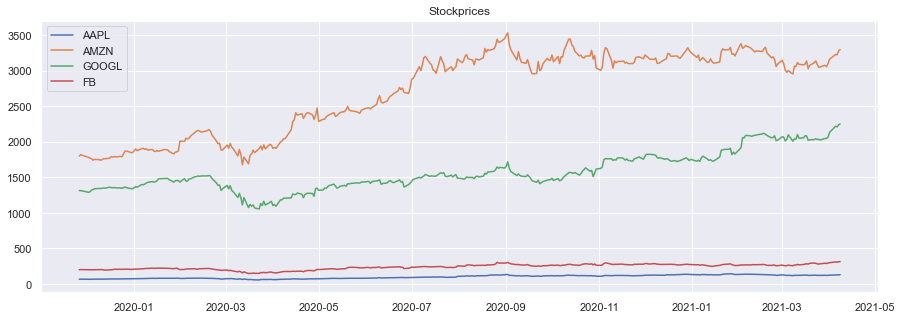

In [133]:
#stockList = [ 'CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stockList= ['AAPL','AMZN','GOOGL','FB']
#stockList = ['GC=F', 'MSFT','GOOGL']
#stocks = [stock + '.AX' for stock in stockList]
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=500)

stockData, meanReturns, covMatrix = get_data(stocks, startDate, endDate)
plot_data(stockData, stockList)



## Make Portfolio

In [126]:
weights= get_weights()
weights

array([0.0478264 , 0.34788245, 0.25547791, 0.34881324])

## Monte Carlo Simulation

### 10 Simulations

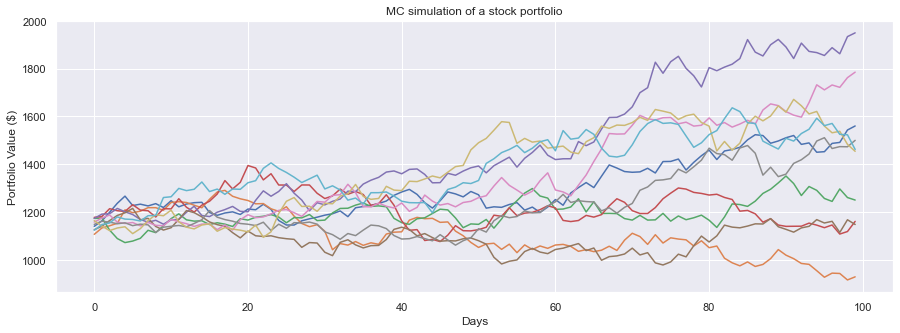

In [127]:
portfolio_sims, initialPortfolio = get_Monte_Carlo(weights,stockData, meanReturns, covMatrix, mc_sims = 10, num_time=100)
plot_portfolio_sim(portfolio_sims)


### 10 Simulations

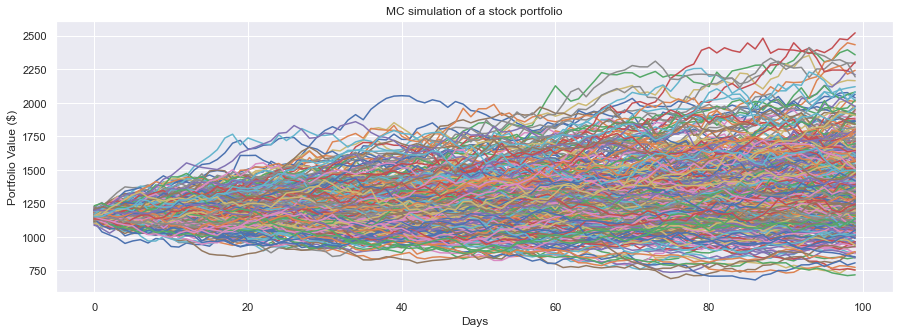

In [128]:
portfolio_sims, initialPortfolio = get_Monte_Carlo(weights,stockData, meanReturns, covMatrix, mc_sims = 400, num_time=100)
plot_portfolio_sim(portfolio_sims)

## Value at Risk

In [129]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR, treshold = get_VaR(portResults,initialPortfolio, alpha=5)
CVaR = get_CVaR(portResults,treshold, initialPortfolio, alpha=5)

print('VaR {}'.format(round(VaR,2)))
print('CVaR {}'.format(round(CVaR,2)))

VaR 199.86
CVaR 288.5
